In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
root_folder = "/Users/alvaroleal/Desktop/DS/komorebi"

df_muestreos_parcela = pd.read_parquet(root_folder + '/muestreos_parcelas.parquet')

In [39]:
def deep_view(df):
    for columna in df.columns:
        print(f"Análisis de la columna: {columna}")

        if pd.api.types.is_numeric_dtype(df[columna]):
            print("Tipo: Numérica")
            print(f"Media: {df[columna].mean()}")
        else:
            print("Tipo: Categórica/Texto")

        print(f"Número total de valores: {df[columna].size}")
        print(f"Número de valores nulos: {df[columna].isnull().sum()}")

        valores_unicos = df[columna].value_counts()
        print(f"Número de valores únicos: {len(valores_unicos)}")

        print("\n" + "-"*50 + "\n")

deep_view(df_muestreos_parcela)

Análisis de la columna: generated_muestreos
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 8

--------------------------------------------------

Análisis de la columna: codparcela
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 5239

--------------------------------------------------

Análisis de la columna: provincia
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 8

--------------------------------------------------

Análisis de la columna: municipio
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 326

--------------------------------------------------

Análisis de la columna: fecha
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 3252

--------------------------------------------------



In [41]:
df_muestreos_parcela.columns

Index(['generated_muestreos', 'codparcela', 'provincia', 'municipio', 'fecha',
       'campaña', 'poligono', 'parcela', 'recinto', 'subrecinto',
       'estado_fenologico_1', 'estado_fenologico_2', 'estado_fenologico_3',
       'estado_fenologico_4', 'estado_fenologico_5', 'estado_fenologico_6',
       'estado_fenologico_7', 'estado_fenologico_8', 'estado_fenologico_9',
       'estado_fenologico_10', 'estado_fenologico_11', 'estado_fenologico_12',
       'estado_fenologico_13', 'estado_fenologico_14', 'porcentaje_floracion',
       'generated_parcelas', '102_coordenada_x_(utm)',
       '103_coordenada_y_(utm)', '104_altitud_(m)', '105_comarca',
       '201_superf_cultivada_en_la_parcela_agrícola_(ha)', '202_pendiente_(%)',
       '203_orientación', '204_textura_del_suelo', '206_secano_/_regadío',
       '211_utilización_de_cubierta_vegetal', '212_tipo_de_cubierta_vegetal',
       '214_cultivo_asociado/otro_aprovechamiento', '301_marco_(m_x_m)',
       '302_densidad_(plantas/ha)', '303_

In [42]:
columns = ['fecha', 
          'codparcela', 'estado_fenologico_1', 'estado_fenologico_2', 'estado_fenologico_3',
          'estado_fenologico_4', 'estado_fenologico_5', 'estado_fenologico_6',
          'estado_fenologico_7', 'estado_fenologico_8', 'estado_fenologico_9',
          'estado_fenologico_10', 'estado_fenologico_11', 'estado_fenologico_12',
          'estado_fenologico_13', 'estado_fenologico_14']

df_reducido = df_muestreos_parcela[columns]

## Razonamiento

Vamos a tratar de crear una columna en la que se recoja con exactitud los días que pasan entre una muestra y otra. Para ello hay que agrupar las muestras por fecha y por parcela para que la primera muestra sobre la que ejecutar el conteo sea la primera de cada año de cada parcela.

In [74]:
df_reducido = df_reducido.sort_values(by=['fecha', 'codparcela'])

df_reducido['dias_diferencia'] = np.nan

df_reducido['año'] = df_reducido['fecha'].dt.year

for _, group in df_reducido.groupby(['codparcela', 'año']):
    mask = df_reducido.index.isin(group.index)
    df_reducido.loc[mask, 'dias_diferencia'] = df_reducido.loc[mask, 'fecha'].diff().dt.days

df_reducido.drop(columns=['año'], inplace=True)

columnas = ['fecha', 'dias_diferencia'] + [col for col in df_reducido.columns if col not in ['fecha', 'dias_diferencia']]
df_reducido = df_reducido[columnas]
df_reducido

/var/folders/p2/qz8vn45j0y7bvrtnwplk9gjm0000gn/T/ipykernel_85723/2895893122.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df_reducido.groupby(['codparcela', 'año']):


,fecha,dias_diferencia,codparcela,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14
241524,2006-03-01,NaN,001-00004-00-00,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30620,2006-03-01,NaN,001-00039-00-00,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183833,2006-03-01,NaN,001-00116-00-00,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185101,2006-03-01,NaN,004-00360-00-00,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44351,2006-03-01,NaN,005-00052-00-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426915,2020-11-25,7.0,005-00014-03-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0
440112,2020-11-25,7.0,014-00250-04-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0
428259,2020-11-25,7.0,015-00031-12-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0
439446,2020-11-25,7.0,017-00009-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN


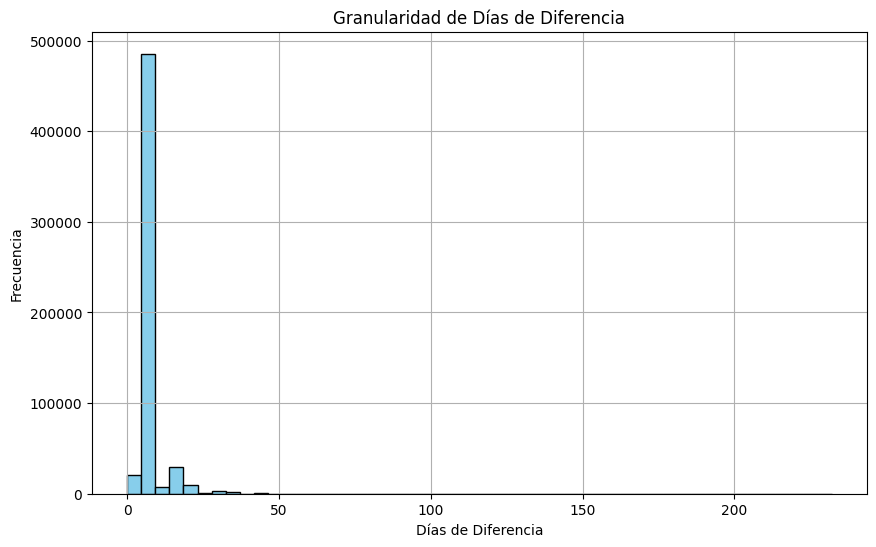

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(df_reducido['dias_diferencia'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Granularidad de Días de Diferencia')
plt.xlabel('Días de Diferencia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Observamos que hay casos donde solamente tenemos una instancia por año, como podemos observar en la primera linea de la tabla superior. Como estos casos no contienen información para nuestro modelo predictivo, los eliminaremos.

In [85]:
df_reducido['año'] = df_reducido['fecha'].dt.year
conteos = df_reducido.groupby(['codparcela', 'año'], observed=True).size().reset_index(name='conteo')
codparcelas_no_validas = conteos.groupby('codparcela', observed=True).filter(lambda x: all(x['conteo'] == 1))['codparcela'].unique()
codparcelas_no_validas = df_reducido[df_reducido['codparcela'].isin(codparcelas_no_validas)]
codparcelas_no_validas

,fecha,dias_diferencia,codparcela,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,año
156209,2006-07-12,NaN,013-00043-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,2006
44306,2007-03-06,NaN,C - 503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
88616,2007-03-06,NaN,C - 504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
44307,2007-03-06,NaN,C - 880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
44308,2007-03-06,NaN,C - 893,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549633,2019-03-20,NaN,007-00086-01-01,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
561157,2019-03-29,NaN,017-00105-05,NaN,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
459683,2019-04-30,NaN,010-00093-01,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
439484,2019-10-28,NaN,022-00180-01-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [86]:
df_reducido = df_reducido[~df_reducido['codparcela'].isin(codparcelas_no_validas)]

In [99]:
print(df_reducido['dias_diferencia'].value_counts().sort_values(ascending=False))

dias_diferencia
7.0      378477
6.0       47868
8.0       39585
14.0      24500
5.0       11848
          ...  
205.0         1
89.0          1
223.0         1
231.0         1
90.0          1
Name: count, Length: 120, dtype: int64


In [101]:
df_reducido['var_objetivo'] = np.nan

estado_fenologico_cols = ['estado_fenologico_1', 'estado_fenologico_2', 'estado_fenologico_3', 'estado_fenologico_4', 'estado_fenologico_5', 'estado_fenologico_6', 'estado_fenologico_7', 'estado_fenologico_8', 'estado_fenologico_9', 'estado_fenologico_10', 'estado_fenologico_11', 'estado_fenologico_12', 'estado_fenologico_13', 'estado_fenologico_14']
def verificar_cambio_en_estado(row, grupo_anterior):
    # Implementa la lógica para verificar si hubo cambio en el estado fenológico
    # y retorna el número de cambios o 0 si no hubo cambios
    # Esto es un esqueleto, debes ajustar esta función según tus columnas de estado fenológico
    cambio = 0
    for col in estado_fenologico_cols:
        if row[col] == 2:  # Si esta columna indica el estado actual
            cambio += 1
    return cambio

# Lógica para aplicar la verificación a cada grupo de 'codparcela'
def procesar_grupo(grupo):
    grupo = grupo.reset_index(drop=True)
    for i in range(len(grupo)):
        if i == 0:  # Primer registro de la codparcela en el dataset
            grupo.at[i, 'var_objetivo'] = 0  # No hay fecha anterior para comparar
        else:
            dias_desde_ultimo = (grupo.at[i, 'fecha'] - grupo.at[0, 'fecha']).days
            if dias_desde_ultimo <= 14:
                # Llama a una función que verifica si hubo cambio en el estado fenológico
                grupo.at[i, 'var_objetivo'] = verificar_cambio_en_estado(grupo.iloc[i], grupo.iloc[:i])
            else:
                grupo.at[i, 'var_objetivo'] = 0  # Más de 14 días desde el último registro relevante
    return grupo

# Aplicar la función a cada grupo de 'codparcela'
df_reducido = df_reducido.groupby('codparcela', as_index=False).apply(procesar_grupo).reset_index(drop=True)

# Asegúrate de adaptar la función verificar_cambio_en_estado para que se ajuste a la lógica específica de tu caso.

/var/folders/p2/qz8vn45j0y7bvrtnwplk9gjm0000gn/T/ipykernel_85723/1254784726.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_reducido = df_reducido.groupby('codparcela', as_index=False).apply(procesar_grupo).reset_index(drop=True)


In [102]:
df_reducido

,fecha,dias_diferencia,codparcela,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,año,var_objetivo
0,2015-08-25,NaN,000-00000-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2015,0.0
1,2015-09-30,36.0,000-00000-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,2015,0.0
2,2015-08-24,NaN,000-00000-00-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2015,0.0
3,2015-08-26,2.0,000-00000-00-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2015,1.0
4,2015-09-28,33.0,000-00000-00-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578467,2020-03-19,7.0,RAIF-4,NaN,NaN,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0
578468,2020-02-05,NaN,RAIF-5,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0
578469,2020-02-27,22.0,RAIF-5,NaN,NaN,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0
578470,2020-03-12,14.0,RAIF-5,NaN,NaN,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.0


In [103]:
hhh = df_reducido[df_reducido['codparcela'] == '011-00181-00-00']
hhh

,fecha,dias_diferencia,codparcela,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,año,var_objetivo
244157,2007-03-16,NaN,011-00181-00-00,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0.0
244158,2007-03-26,10.0,011-00181-00-00,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,1.0
244159,2007-04-03,8.0,011-00181-00-00,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0.0
244160,2007-04-17,14.0,011-00181-00-00,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0.0
244161,2007-04-25,8.0,011-00181-00-00,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244335,2018-10-08,7.0,011-00181-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2018,0.0
244336,2018-10-15,7.0,011-00181-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,2018,0.0
244337,2018-10-22,7.0,011-00181-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,2018,0.0
244338,2018-10-29,7.0,011-00181-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,2018,0.0


In [94]:
hhh = df_reducido[df_reducido['dias_diferencia'] == 90]
hhh

,fecha,dias_diferencia,codparcela,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,año
32551,2007-10-08,90.0,011-00181-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,2007


In [98]:
hhh = df_reducido[(df_reducido['codparcela'] == '011-00181-00-00') & (df_reducido['fecha'].dt.year == 2007)]
hhh

,fecha,dias_diferencia,codparcela,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,año
32538,2007-03-16,NaN,011-00181-00-00,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
32539,2007-03-26,10.0,011-00181-00-00,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
32540,2007-04-03,8.0,011-00181-00-00,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
32541,2007-04-17,14.0,011-00181-00-00,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
32542,2007-04-25,8.0,011-00181-00-00,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
32543,2007-05-09,14.0,011-00181-00-00,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
32544,2007-05-14,5.0,011-00181-00-00,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
32545,2007-05-29,15.0,011-00181-00-00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2007
32546,2007-06-04,6.0,011-00181-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2007
32547,2007-06-11,7.0,011-00181-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2007


In [82]:
hhh = df_reducido[df_reducido['codparcela'] == 'C - 503']
hhh

,fecha,dias_diferencia,codparcela,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,año
44306,2007-03-06,NaN,C - 503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
